In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
import umap
import time

In [63]:
health_data = pd.read_csv('/Users/captzam/Documents/Thinkful Data Science Projects/Datasets/Healthcare.csv')

In [65]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [67]:
health_raw = health_data.copy()

In [69]:
label_encode = LabelEncoder()
for column in health_raw.select_dtypes(include=['object']).columns:
    health_raw[column] = label_encode.fit_transform(health_raw[column])

health_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 3000 non-null   int64
 1   AGE                    3000 non-null   int64
 2   SMOKING                3000 non-null   int64
 3   YELLOW_FINGERS         3000 non-null   int64
 4   ANXIETY                3000 non-null   int64
 5   PEER_PRESSURE          3000 non-null   int64
 6   CHRONIC_DISEASE        3000 non-null   int64
 7   FATIGUE                3000 non-null   int64
 8   ALLERGY                3000 non-null   int64
 9   WHEEZING               3000 non-null   int64
 10  ALCOHOL_CONSUMING      3000 non-null   int64
 11  COUGHING               3000 non-null   int64
 12  SHORTNESS_OF_BREATH    3000 non-null   int64
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64
 14  CHEST_PAIN             3000 non-null   int64
 15  LUNG_CANCER            3000 non-null  

In [71]:
scaler = StandardScaler()

health_stnd = scaler.fit_transform(health_raw) #<- standardized data for EDA and modeling


In [73]:
#PCA 
pca = PCA(n_components=2) #reduced dimensions from 16 to 2

pca_health = pca.fit_transform(health_stnd) #fitting data to PCA reduction 

df_pca = pd.DataFrame(pca_health, columns=('PCA1','PCA2'))# <- Dataframe for PCA


In [77]:
#t-SNE

tsne = TSNE(n_components=2, n_iter=300,random_state=42)

tsne_health = tsne.fit_transform(health_stnd)

df_tsne = pd.DataFrame(tsne_health, columns=('TSNE1','TSNE2'))

In [79]:
#UMAP 
time_start = time.time()

umap_health = umap.UMAP(n_neighbors=5, min_dist=.3, metric='correlation').fit_transform(health_stnd)

print('UMAP done! Time elapsed:{} seconds'.format(time.time()-time_start))

df_umap = pd.DataFrame(umap_health, columns=('UMAP1','UMAP2'))


UMAP done! Time elapsed:2.7762598991394043 seconds


In [171]:
#Apply each reduction technique to respective cluster algos K-Means

kmeans = KMeans(n_clusters=3, n_init=15, random_state=43)

#Kmeans with no Dimension Reduction 


kmeans_result = kmeans.fit_predict(health_stnd)

means_silhouette_score = silhouette_score(health_stnd, kmeans_result, metric='euclidean')

print('The silhouette score of the Kmean solution without reduction:{}'.format(means_silhouette_score))

##K-Means & PCA##


kmeans_pca = kmeans.fit_predict(pca_health)

pca_silhouette_score = silhouette_score(health_stnd, kmeans_pca, metric='euclidean')

print('The silhouette score of the Kmean solution using PCA:{}'.format(pca_silhouette_score))

#adding to original dataframe
health_raw['KMeans_PCA_Labels'] = kmeans_pca

##K-means & t-SNE##
kmeans_tsne = kmeans.fit_predict(tsne_health)

tsne_silhouette_score = silhouette_score(health_stnd, kmeans_tsne, metric='euclidean')

print('The silhouette score of the Kmean solution using t-SNE:{}'.format(tsne_silhouette_score))

#adding to original dataframe
health_raw['KMeans_tSNE_Labels'] = kmeans_tsne

##K-Means & UMAP##
kmeans_umap = kmeans.fit_predict(umap_health)

umap_silhouette_score = silhouette_score(health_stnd, kmeans_umap, metric='euclidean')
print('The silhouette score of the Kmean solution using UMAP:{}'.format(umap_silhouette_score))
#adding to original dataframe
health_raw['KMeans_UMAP_Labels'] = kmeans_umap


kmeans_inertia = kmeans.inertia_
print('The inertia of the Kmeans model is {}'.format(kmeans_inertia))


The silhouette score of the Kmean solution without reduction:0.05073855621738145
The silhouette score of the Kmean solution using PCA:0.039602782511838096
The silhouette score of the Kmean solution using t-SNE:0.03052283920236231
The silhouette score of the Kmean solution using UMAP:0.019691245423436664
The inertia of the Kmeans model is 12042.0830078125


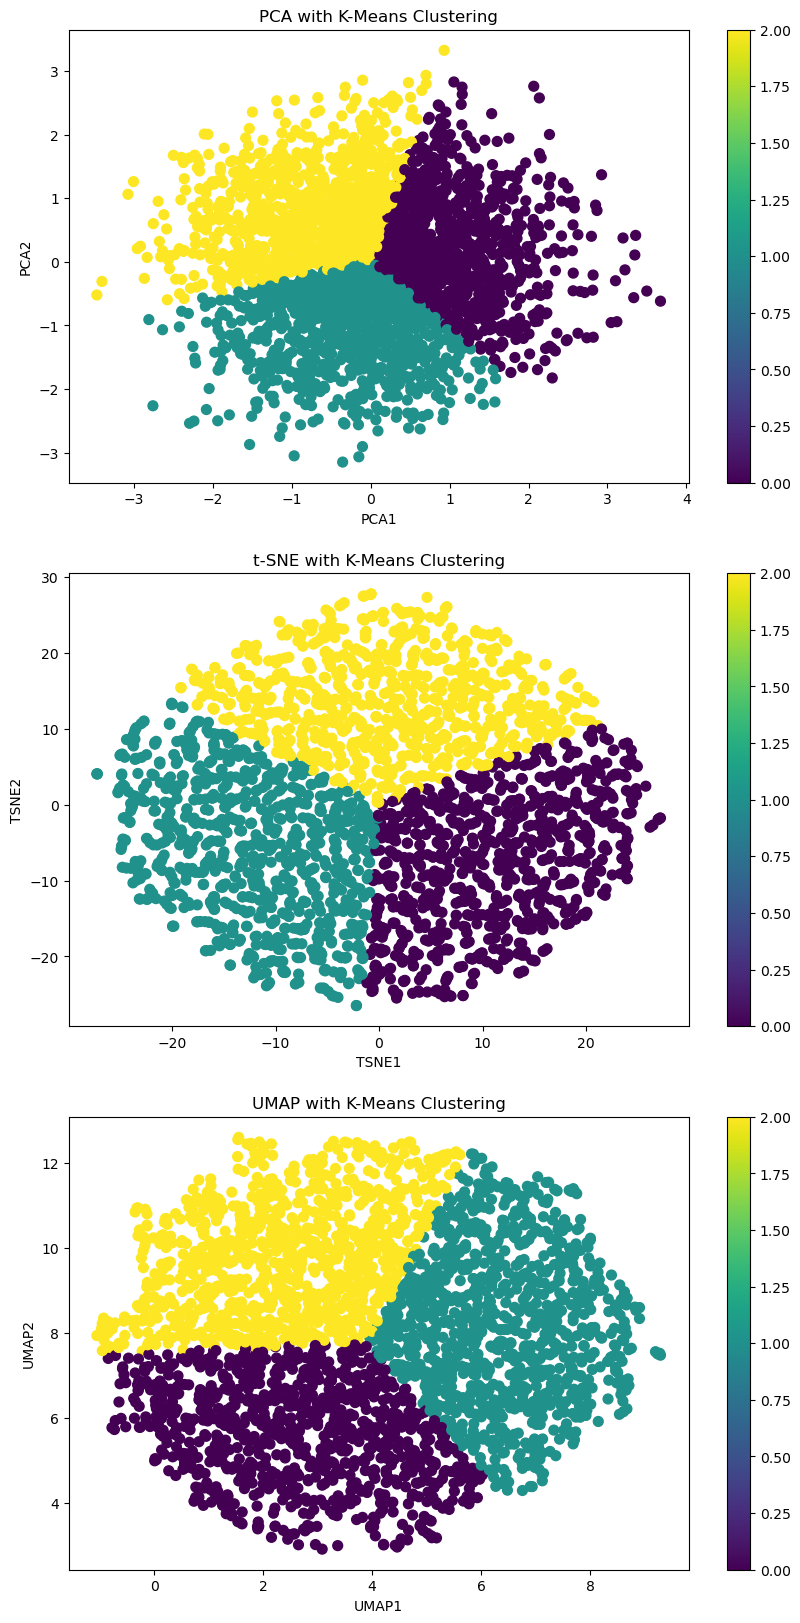

In [169]:
#KMeans Visuals with PCA
plt.figure(figsize=(10,20))

plt.subplot(3,1,1)
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=kmeans_pca, cmap='viridis', s=50)
plt.title('PCA with K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()


#KMeans Visuals with t-SNE
plt.subplot(3,1,2)
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=kmeans_tsne, cmap='viridis', s=50)
plt.title('t-SNE with K-Means Clustering')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar()


#KMeans Visuals with UMAP
plt.subplot(3,1,3)
plt.scatter(df_umap['UMAP1'], df_umap['UMAP2'], c=kmeans_umap, cmap='viridis', s=50)
plt.title('UMAP with K-Means Clustering')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar()



In [179]:
#DBSCAN analysis
dbscan = DBSCAN(eps=0.1, min_samples=3)

#DBSCAN no reduction 
dbscan_norm = dbscan.fit_predict(health_stnd)

silhouette_score_dbscan = silhouette_score(health_stnd, dbscan_norm, metric='euclidean')
print('the silhouette score for dbscan without reduction is {}'.format(silhouette_score_dbscan))

#DBSCAN & PCA

dbscan_pca = dbscan.fit_predict(pca_health)
pca_silhouette_score_dbscan = silhouette_score(health_stnd, dbscan_pca, metric='euclidean')
print('the silhouette score for dbscan with PCA is {}'.format(pca_silhouette_score_dbscan))

#DBSCAN & t-SNE

dbscan_tsne = dbscan.fit_predict(tsne_health)
tsne_silhouette_score_dbscan = silhouette_score(health_stnd, dbscan_tsne, metric='euclidean')
print('the silhouette score for dbscan with TSNE is {}'.format(tsne_silhouette_score_dbscan))

#DBSCAN & UMAP

dbscan_umap = dbscan.fit_predict(umap_health)
umap_silhouette_score_dbscan = silhouette_score(health_stnd, dbscan_umap, metric='euclidean')
print('the silhouette score for dbscan with UMAP is {}'.format(umap_silhouette_score_dbscan))

#trying a new approach because I am only getting one cluster with DBSCAN

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [181]:
n_clusters = len(set(dbscan_norm)) - (1 if -1 in dbscan_norm else 0)  # Ignore noise if present

if n_clusters > 1:
    silhouette_score_dbscan = silhouette_score(health_stnd, dbscan_norm, metric='euclidean')
    print('The silhouette score for DBSCAN without reduction is {}'.format(silhouette_score_dbscan))
else:
    print('DBSCAN found only one cluster (or all points are noise); skipping silhouette score calculation.')

# DBSCAN & PCA
dbscan_pca = dbscan.fit_predict(pca_health)
n_clusters_pca = len(set(dbscan_pca)) - (1 if -1 in dbscan_pca else 0)

if n_clusters_pca > 1:
    pca_silhouette_score_dbscan = silhouette_score(health_stnd, dbscan_pca, metric='euclidean')
    print('The silhouette score for DBSCAN with PCA is {}'.format(pca_silhouette_score_dbscan))
else:
    print('DBSCAN with PCA found only one cluster (or all points are noise); skipping silhouette score calculation.')

# DBSCAN & t-SNE
dbscan_tsne = dbscan.fit_predict(tsne_health)
n_clusters_tsne = len(set(dbscan_tsne)) - (1 if -1 in dbscan_tsne else 0)

if n_clusters_tsne > 1:
    tsne_silhouette_score_dbscan = silhouette_score(health_stnd, dbscan_tsne, metric='euclidean')
    print('The silhouette score for DBSCAN with t-SNE is {}'.format(tsne_silhouette_score_dbscan))
else:
    print('DBSCAN with t-SNE found only one cluster (or all points are noise); skipping silhouette score calculation.')

# DBSCAN & UMAP
dbscan_umap = dbscan.fit_predict(umap_health)
n_clusters_umap = len(set(dbscan_umap)) - (1 if -1 in dbscan_umap else 0)

if n_clusters_umap > 1:
    umap_silhouette_score_dbscan = silhouette_score(health_stnd, dbscan_umap, metric='euclidean')
    print('The silhouette score for DBSCAN with UMAP is {}'.format(umap_silhouette_score_dbscan))
else:
    print('DBSCAN with UMAP found only one cluster (or all points are noise); skipping silhouette score calculation.')

DBSCAN found only one cluster (or all points are noise); skipping silhouette score calculation.
The silhouette score for DBSCAN with PCA is -0.18032273608563423
The silhouette score for DBSCAN with t-SNE is -0.2558947735020409
The silhouette score for DBSCAN with UMAP is -0.2200310707481495


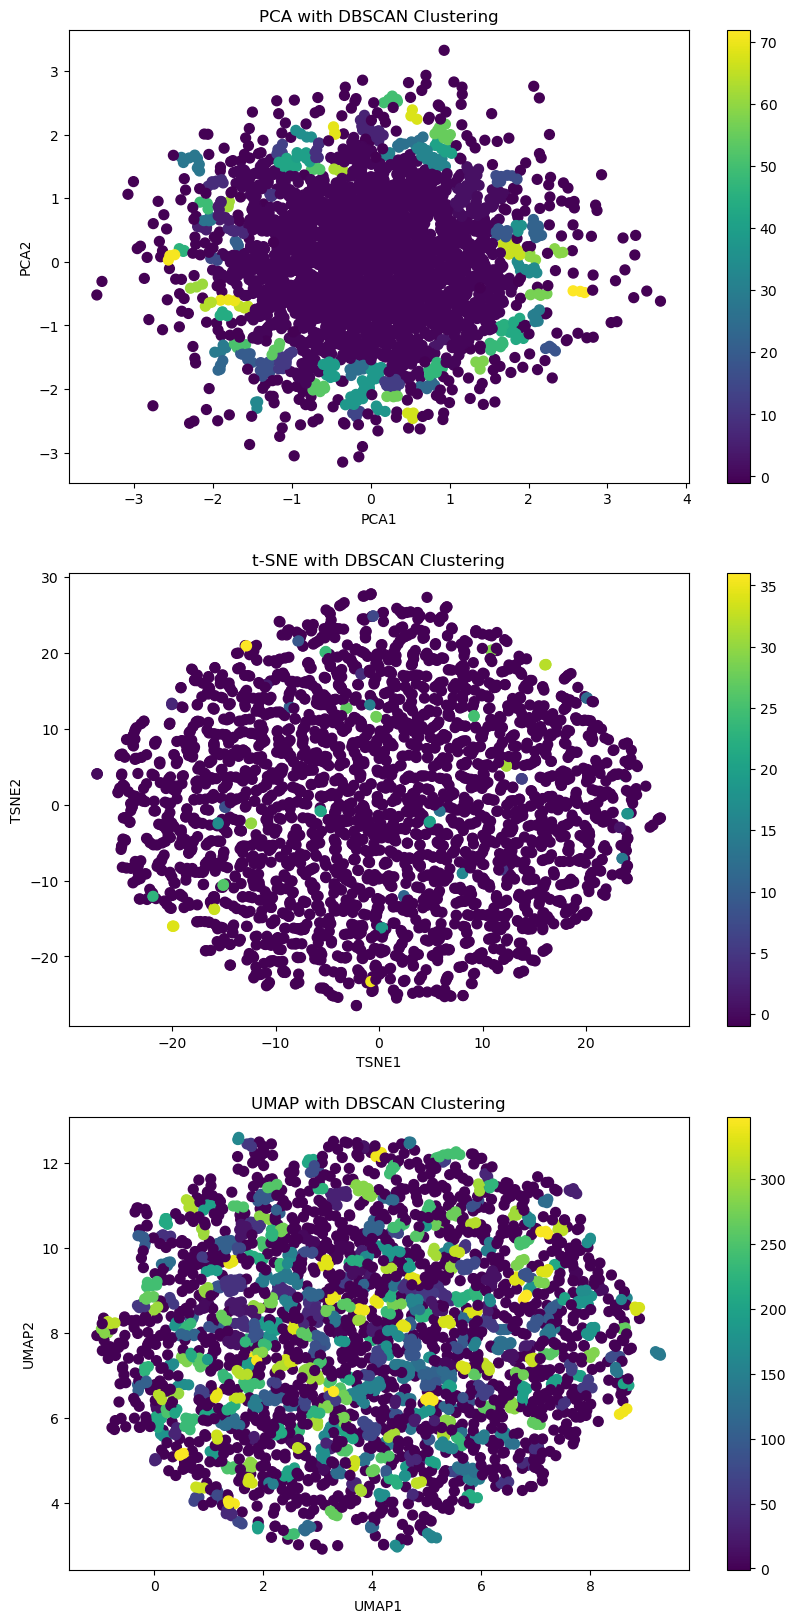

In [185]:
#DBSCAN Visuals with PCA
plt.figure(figsize=(10,20))

plt.subplot(3,1,1)
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=dbscan_pca, cmap='viridis', s=50)
plt.title('PCA with DBSCAN Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()


#DBSCAN Visuals with t-SNE
plt.subplot(3,1,2)
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=dbscan_tsne, cmap='viridis', s=50)
plt.title('t-SNE with DBSCAN Clustering')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar()


#DBSCAN Visuals with UMAP
plt.subplot(3,1,3)
plt.scatter(df_umap['UMAP1'], df_umap['UMAP2'], c=dbscan_umap, cmap='viridis', s=50)
plt.title('UMAP with DBSCAN Clustering')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar()



In [189]:
#Gaussian Mixture Model analysis 
gmm = GaussianMixture(n_components=3, random_state=42)

# GMM with no Reduction 
gmm_norm = gmm.fit_predict(health_stnd)

silhouette_score_gmm = silhouette_score(health_stnd, gmm_norm, metric='euclidean')
print('The silhouette score for Gaussian Mixture without reduction is {}'.format(silhouette_score_gmm))

#GMM with PCA

gmm_pca = gmm.fit_predict(pca_health)

pca_silhouette_score_gmm = silhouette_score(health_stnd, gmm_pca, metric='euclidean')
print('The silhouette score for Gaussian Mixture with PCA is {}'.format(pca_silhouette_score_gmm))

#GMM with t-SNE

gmm_tsne = gmm.fit_predict(health_stnd)

tsne_silhouette_score_gmm = silhouette_score(health_stnd, gmm_tsne, metric='euclidean')
print('The silhouette score for Gaussian Mixture with t-SNE is {}'.format(tsne_silhouette_score_gmm))

#GMM UMAP 

gmm_umap = gmm.fit_predict(health_stnd)

umap_silhouette_score_gmm = silhouette_score(health_stnd, gmm_umap, metric='euclidean')
print('The silhouette score for Gaussian Mixture with UMAP is {}'.format(umap_silhouette_score_gmm))

The silhouette score for Gaussian Mixture without reduction is 0.0500566123244642
The silhouette score for Gaussian Mixture with PCA is 0.037532583770056936
The silhouette score for Gaussian Mixture with t-SNE is 0.0500566123244642
The silhouette score for Gaussian Mixture with UMAP is 0.0500566123244642


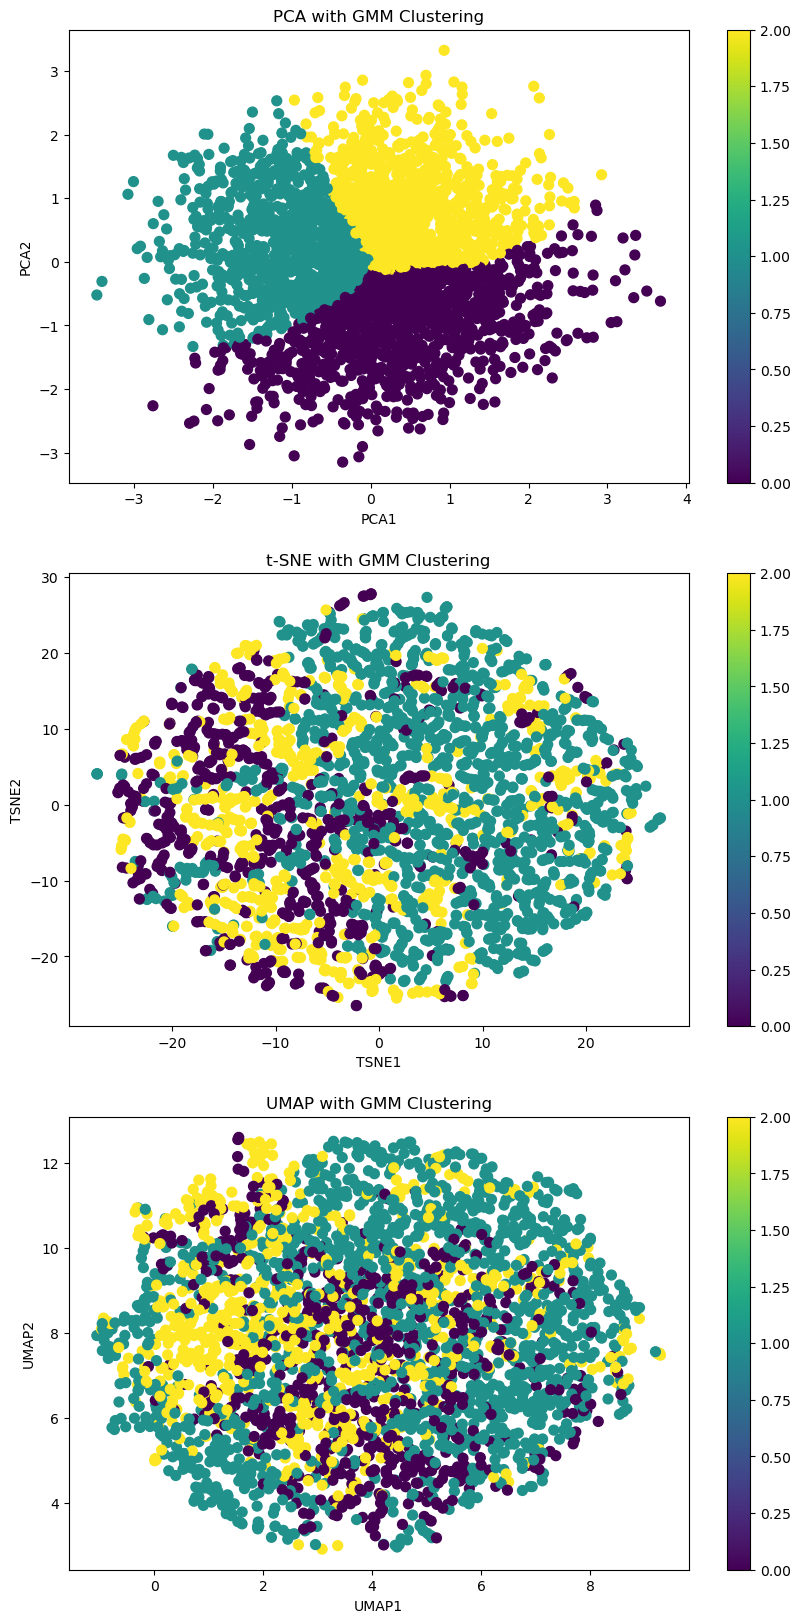

In [193]:
#GMM Visuals with PCA
plt.figure(figsize=(10,20))

plt.subplot(3,1,1)
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=gmm_pca, cmap='viridis', s=50)
plt.title('PCA with GMM Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()


#GMM Visuals with t-SNE
plt.subplot(3,1,2)
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=gmm_tsne, cmap='viridis', s=50)
plt.title('t-SNE with GMM Clustering')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar()


#GMM Visuals with UMAP
plt.subplot(3,1,3)
plt.scatter(df_umap['UMAP1'], df_umap['UMAP2'], c=gmm_umap, cmap='viridis', s=50)
plt.title('UMAP with GMM Clustering')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar()

